<a href="https://colab.research.google.com/github/amik123/CNN_Projects/blob/main/ImplementationofCNNfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:17<00:00, 95.6MB/s]
100% 1.06G/1.06G [00:17<00:00, 64.1MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d/content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

Import all the necessary libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imghdr
import random
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,Sequential,models
from keras.layers import Dense


In [ ]:
random.sample(os.listdir('/content/dogs_vs_cats/test/cats'),5) #os.listdr lists all the file inside the folder in the form of list

['cat.8743.jpg',
 'cat.3124.jpg',
 'cat.1331.jpg',
 'cat.3810.jpg',
 'cat.2954.jpg']

In [ ]:
def plot_images_from_directory(directory,class_name,no_of_images=9):
  #Retrieve list of all file names in a directory
  list_of_images=os.listdir(directory)
  # If there are fewer images than requested, we'll just show them all
  if len(list_of_images)<no_of_images:
    print(f"there are only {len(list_of_images)} in the {directory} directory")
    no_of_images=len(list_of_images)
  # Randomly select 'num_images' number of file names
  random_images=random.sample(list_of_images,no_of_images)
  #Plotting the image
  fig,axes=plt.subplots(3,3,figsize=(8,8))
  axes=axes.ravel()
  for i,image_file in enumerate(random_images):
    image_path=os.path.join(directory,image_file)
    image=Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image{i}:{class_name}")
    axes[i].axis('off') #hides the axis

  plt.tight_layout()
  plt.show()


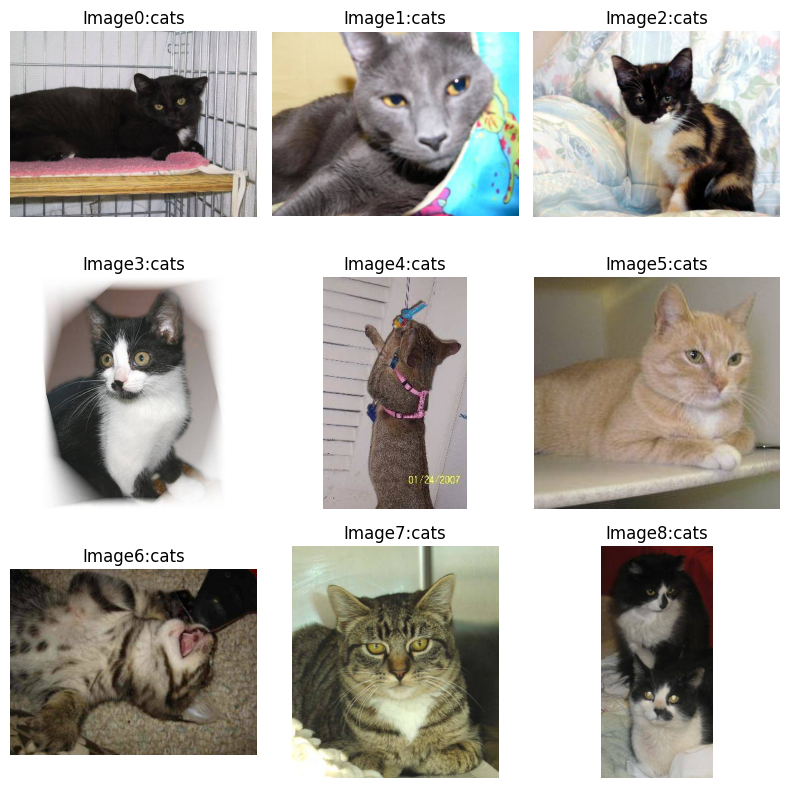

In [ ]:
cat_directory_path='/content/dogs_vs_cats/train/cats'
plot_images_from_directory(cat_directory_path,'cats')

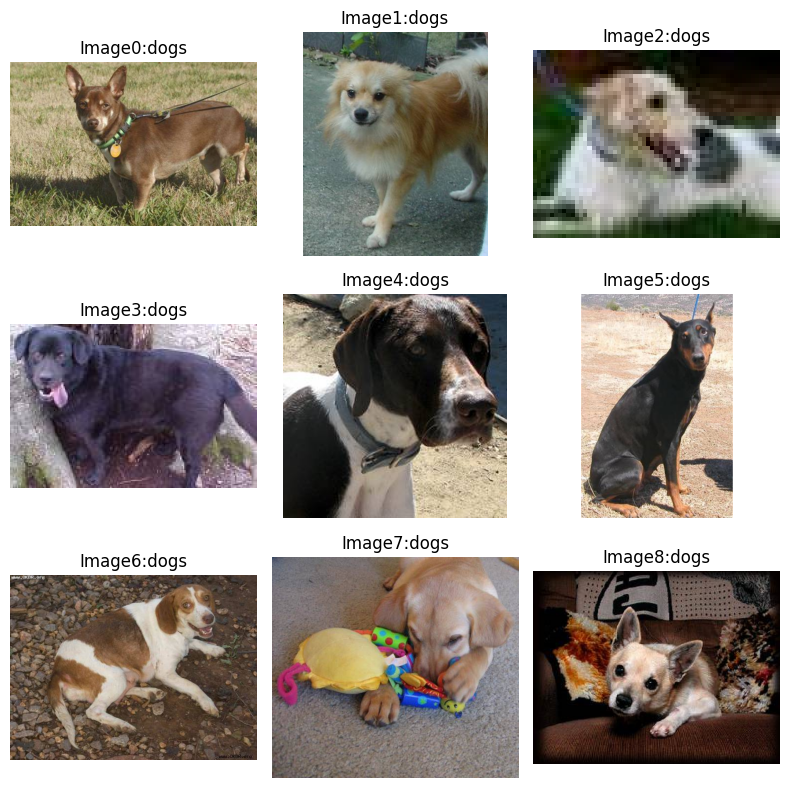

In [ ]:
dog_directory_path='/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(dog_directory_path,'dogs')

# Data Analysis

In [ ]:
cat_images=os.listdir(cat_directory_path)
dog_images=os.listdir(dog_directory_path)
print(len(cat_images))
print(len(dog_images))

10000
10000


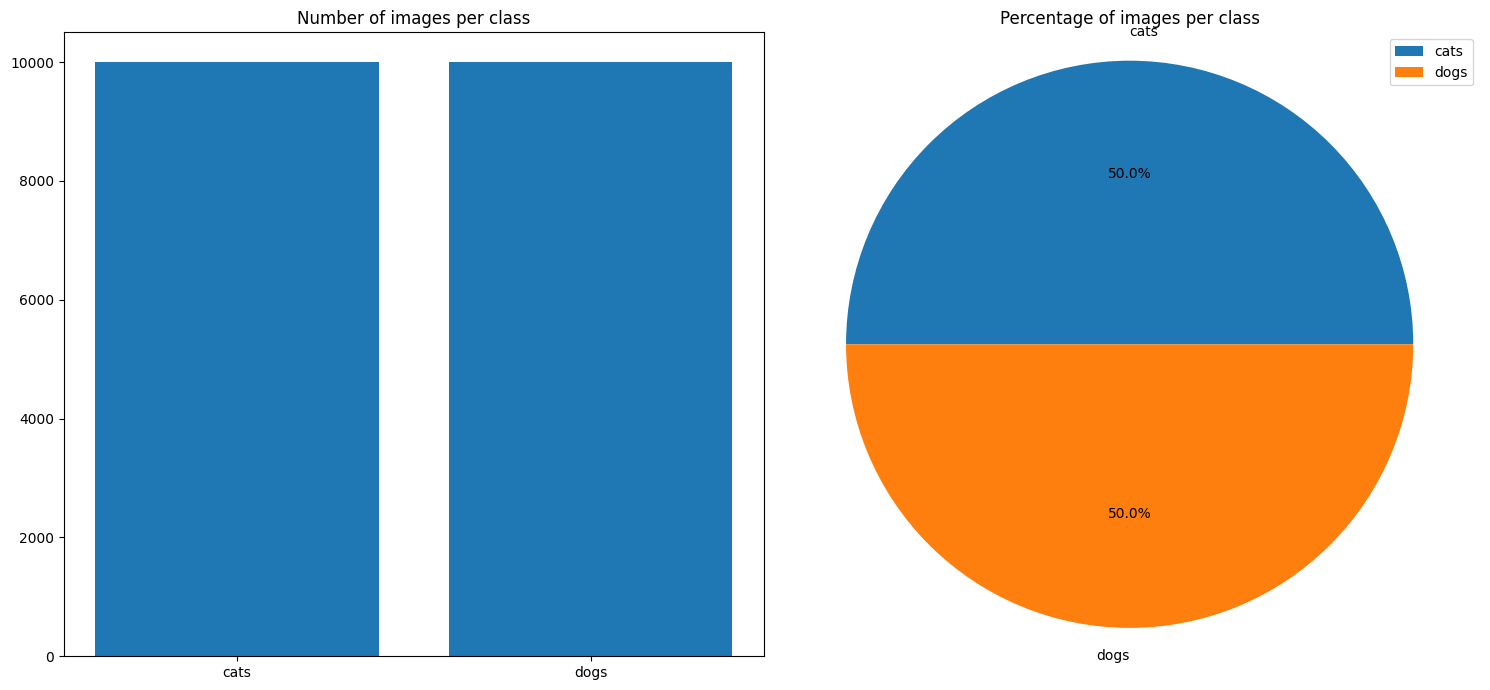

In [ ]:
#creating both a bar chart and pie chart side by side in a single figure
#setting up a figure and axes for two subplots; one for barchart and the other for piechart
class_animal= ['cats','dogs']
fig,axes=plt.subplots(1,2,figsize=(15, 7))
#Barchart on the first subplot
axes[0].bar(class_animal,height=[len(cat_images),len(dog_images)])
axes[0].set_title('Number of images per class')
#Piechart on the second subplot
x=[len(cat_images),len(dog_images)]
axes[1].pie(x,labels=class_animal,autopct='%1.1f%%')
axes[1].set_title('Percentage of images per class')
axes[1].axis('equal')
axes[1].legend()

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

#Removing Corrupted Images

In [ ]:
#Define the list of acceptable image extension
acceptable_image_extensions=['jpg','jpeg','png']
data_dir='/content/dogs_vs_cats'
#walk through all the directories and files in a dataset
for root,dir,files in os.walk(data_dir):
  for file in files:
    file_path=os.path.join(root,file)
    try:
      file_type=imghdr.what(file_path)
      if file_type not in acceptable_image_extensions:
        print(f"Image not in format:{file_path}")
        os.remove(file_path)
      else:
        img=cv2.imread(file_path)
    except Exception as e:
      print(f'Issue with file{file_path}, error:{e}')
      os.remove(file_path)



#Loading shapes and channels

In [ ]:
def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
        image_array = np.array(img)
        return image_array
  except IOError:
    print(f"Could not read the image file at {image_path}.")
    return None

array([[[ 39,  44,  40],
        [ 39,  44,  40],
        [ 40,  44,  43],
        ...,
        [207, 204, 173],
        [202, 199, 166],
        [201, 198, 163]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [203, 200, 169],
        [199, 196, 163],
        [197, 194, 159]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [199, 195, 166],
        [199, 194, 164],
        [199, 194, 162]],

       ...,

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 36,  23,  17],
        [ 41,  30,  24],
        [ 57,  46,  40]],

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 42,  29,  21],
        [ 44,  34,  25],
        [ 55,  45,  36]],

       [[ 32,  30,  31],
        [ 29,  27,  28],
        [ 25,  23,  24],
        ...,
        [ 51,  38,  30],
        [ 42,  32,  23],
        [ 40,  30,  21]]], dtype=uint8)
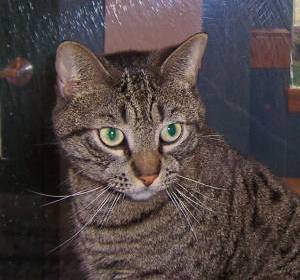

In [ ]:
image_to_array('/content/dogs_vs_cats/train/cats/cat.1.jpg')

#Using CV2


In [ ]:
img=cv2.imread('/content/dogs_vs_cats/train/cats/cat.1.jpg')
print(img.shape)


(280, 300, 3)


#Building Model

In [ ]:
base_dir='/content/dogs_vs_cats/train'
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


#Getting class labels


In [ ]:
train_class_labels=train_generator.class_indices
print(train_class_labels)
validation_class_labels=validation_generator.class_indices
print(validation_class_labels)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


#Visualizing the batch image

In [ ]:
images,labels=next(train_generator)

In [ ]:
train_generator.reset()

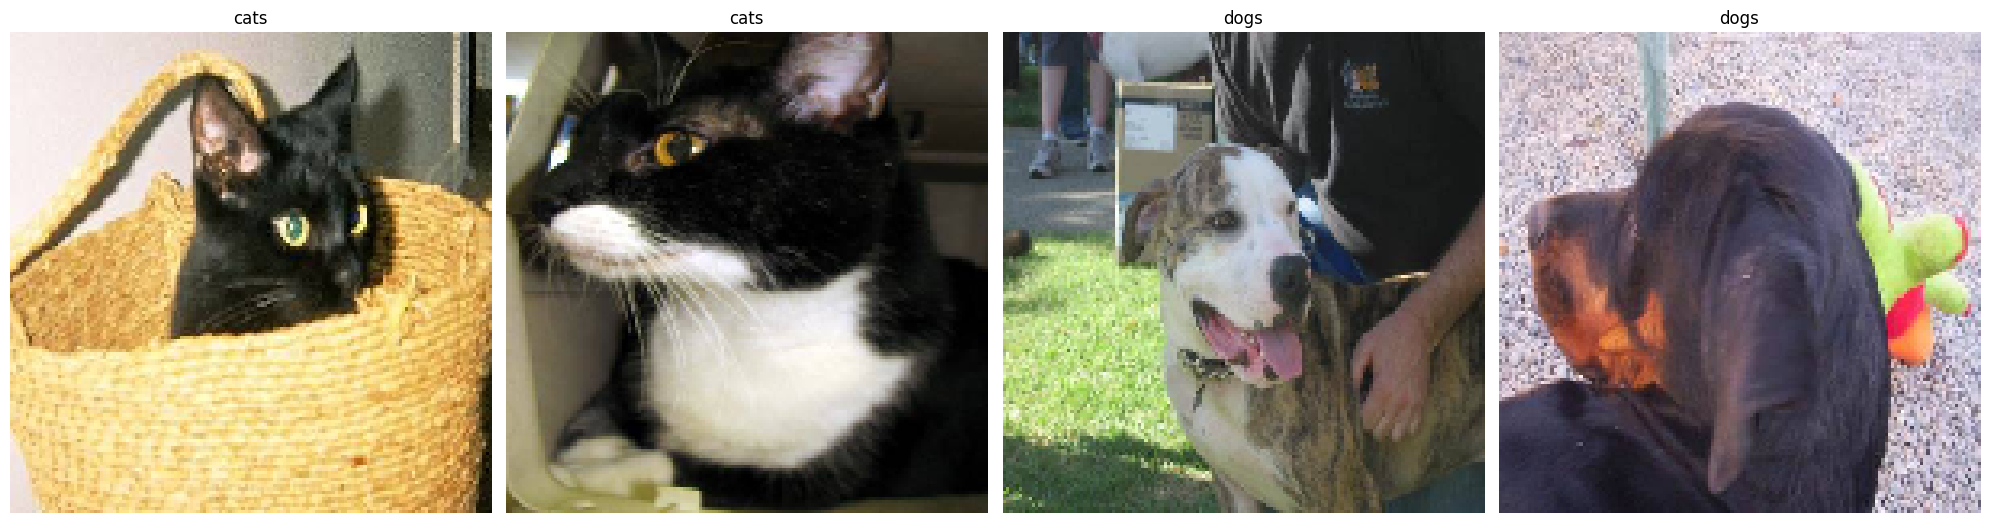

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [ ]:
#My way of doing
def plot_images_from_generator(generator, no_of_images=9):
  fig,axes=plt.subplots(3,3,figsize=(8,8))
  axes=axes.ravel()
  image,label=next(generator)
  # generator.class_indices
  class_labels = dict((v,k) for k,v in generator.class_indices.items())
  for i in range(no_of_images):

    axes[i].imshow(image[i])
    axes[i].set_title(f"Image{i}:{class_labels[label[i]]}")
    axes[i].axis('off') #hides the axis

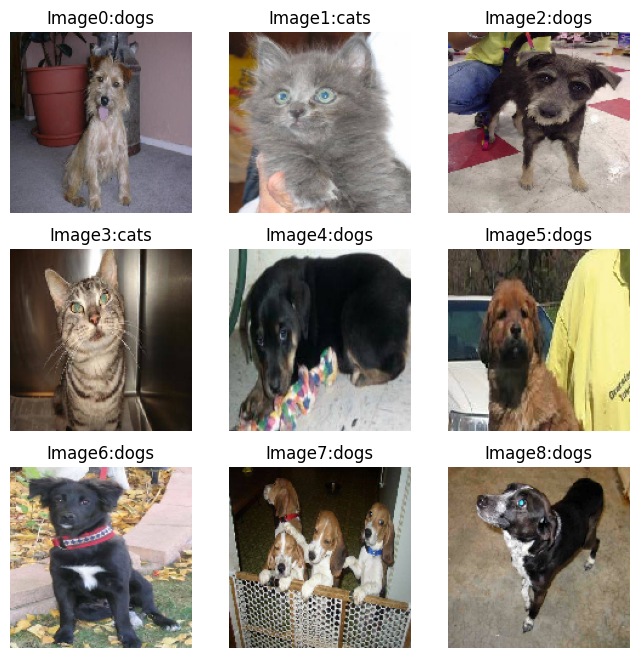

In [ ]:
plot_images_from_generator(train_generator)

#Basic CNN Model


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [ ]:
np.ceil(5.2)


6.0

In [ ]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10
800/800 [==============================] - 40s 46ms/step - loss: 0.6628 - accuracy: 0.5934 - val_loss: 0.6366 - val_accuracy: 0.6640
Epoch 2/10
800/800 [==============================] - 36s 45ms/step - loss: 0.5568 - accuracy: 0.7152 - val_loss: 0.5358 - val_accuracy: 0.7423
Epoch 3/10
800/800 [==============================] - 36s 44ms/step - loss: 0.4673 - accuracy: 0.7793 - val_loss: 0.4909 - val_accuracy: 0.7673
Epoch 4/10
800/800 [==============================] - 37s 47ms/step - loss: 0.4024 - accuracy: 0.8155 - val_loss: 0.3958 - val_accuracy: 0.8240
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.3374 - accuracy: 0.8511 - val_loss: 0.3948 - val_accuracy: 0.8260
Epoch 6/10
800/800 [==============================] - 35s 44ms/step - loss: 0.2787 - accuracy: 0.8817 - val_loss: 0.3584 - val_accuracy: 0.8428
Epoch 7/10
800/800 [==============================] - 35s 43ms/step - loss: 0.2164 - accuracy: 0.9110 - val_loss: 0.3612 - val_accuracy:

In [ ]:
history.history

{'loss': [0.6627513766288757,
  0.5567923188209534,
  0.4673215448856354,
  0.402415931224823,
  0.3373832106590271,
  0.2787175178527832,
  0.2164330929517746,
  0.1641499549150467,
  0.11717010289430618,
  0.08896427601575851],
 'accuracy': [0.593375027179718,
  0.7151874899864197,
  0.7792500257492065,
  0.815500020980835,
  0.8510624766349792,
  0.8817499876022339,
  0.9110000133514404,
  0.9334375262260437,
  0.9531875252723694,
  0.9661250114440918],
 'val_loss': [0.6365707516670227,
  0.5357742309570312,
  0.49087798595428467,
  0.3958122134208679,
  0.3948032557964325,
  0.358376145362854,
  0.3611920177936554,
  0.44670405983924866,
  0.42848601937294006,
  0.5448956489562988],
 'val_accuracy': [0.6639999747276306,
  0.7422500252723694,
  0.7672500014305115,
  0.8240000009536743,
  0.8259999752044678,
  0.8427500128746033,
  0.8567500114440918,
  0.8582500219345093,
  0.8647500276565552,
  0.8615000247955322]}

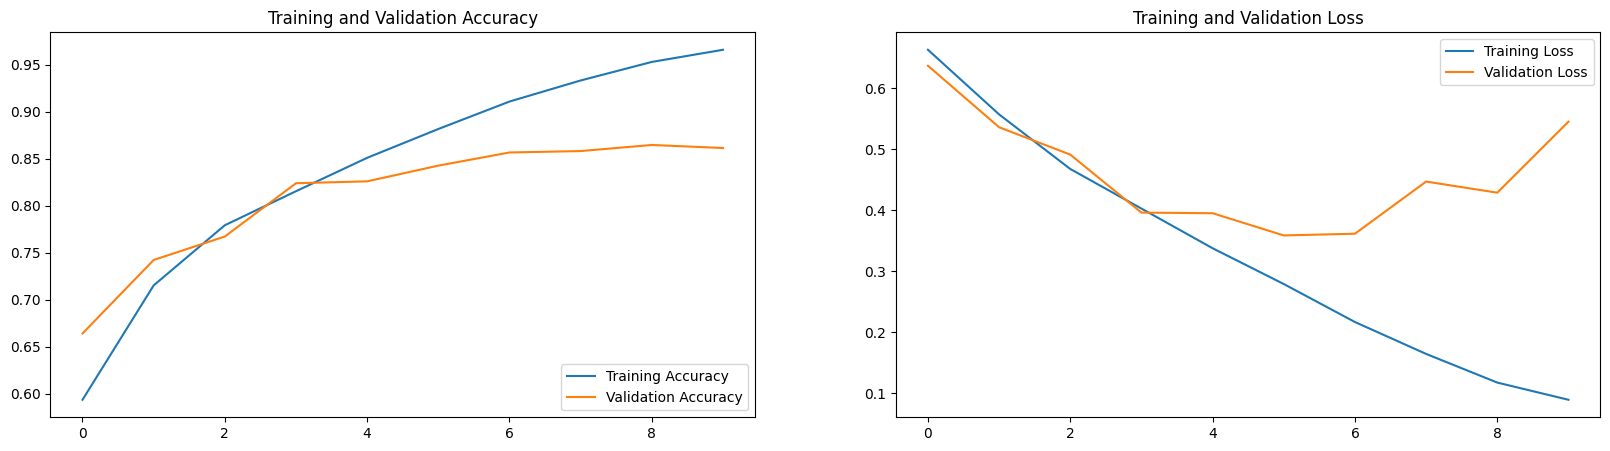

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Model Evaluation

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [ ]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities.shape

250/250 [==============================] - 8s 31ms/step


(5000, 1)

In [ ]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 9s 35ms/step


array([0, 0, 0, ..., 1, 0, 1])

#Plotting ConfusionMatrix

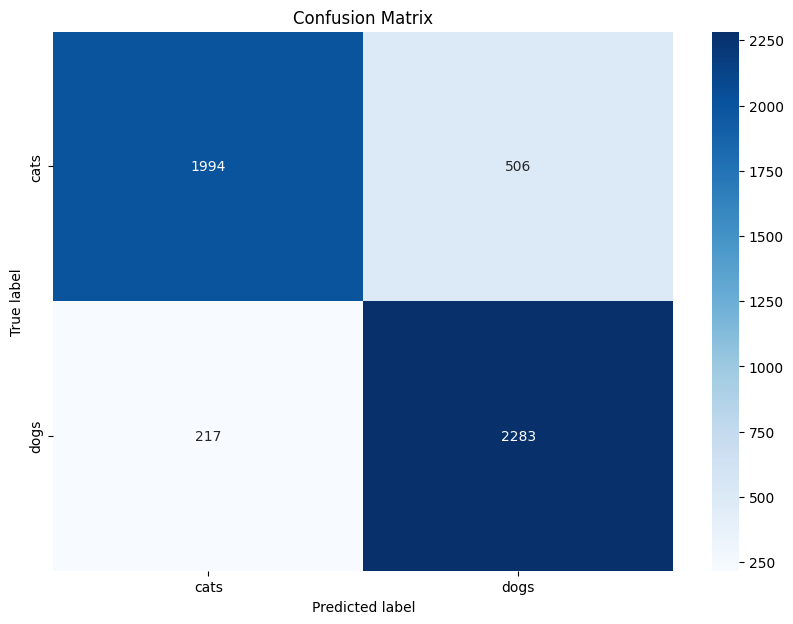

In [ ]:
cm=confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
loss,accuracy=model.evaluate(test_generator)
print(loss,accuracy)


['cats', 'dogs']

#Single Image Prediction

In [ ]:
def make_prediction(image_path):
  img=cv2.imread(image_path)
  img=cv2.resize(img,(150,150))
  img=img/255.0
  img=np.expand_dims(img,axis=0)
  prediction=model.predict(img)
  print(prediction)

  plt.subplot(1,2,1)
  plt.imshow(image_path)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title("Resized Image")
  plt.axis('off')
  plt.show()